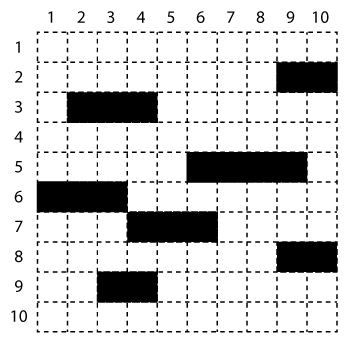

Ovire so podane kot seznam terk `(x0, x1, y)`, kjer je `y` številka vrstice, `x0` in `x1` pa skrajni levi in desni stolpec ovire. Seznam ovir ni urejen ne po vrsticah ne kakorkoli drugače.

Ovire na sliki (ki se uporabljajo v nalogah 1, 3 in 4 ter, z nekaj dodatnimi v 2) so lahko predstavljene s seznamom `[(1, 3, 6), (2, 4, 3), (3, 4, 9), (6, 9, 5), (9, 10, 2), (9, 10, 8), (4, 6, 7)]`.

## 1. Relativno prosti stolpci

Napiši funkcijo `manj_kot_tri(ovire, nstolpcev)`, ki prejme seznam ovir in številko zadnjega stolpca. Vrniti mora urejen seznam številk stolpcev, ki jih pokrivajo manj kot tri ovire. Za primer na sliki vrne [1, 2, 5, 6, 7, 8, 10].

### Rešitev

Ena možnost je, da pripravimo slovar, katerega ključi so številke stolpcev, vrednosti pa povejo število ovir v tem stolpcu. Gremo čez vse ovire, za vsako oviro čez vse stolpce, in prištevamo. Na koncu gremo od 1 do `nstolpcev` in v seznam dodamo vse številke stolpcev, za katere v slovarju piše, da imajo manj kot tri ovire.

In [1]:
def manj_kot_tri(ovire, nstolpcev):
    ovir = defaultdict(int)
    for x0, x1, y in ovire:
        for x in range(x0, x1 + 1):
            ovir[x] += 1
    return [i for i in range(1, 1 + nstolpcev) if ovir[i] < 3]

Manj fancy - a nič dosti slabša, čeprav nekoliko počasnejša - ni rešitev, v kateri gremo prek vseh stolpcev in za vsak stolpec čez vse ovire. Preštejemo, koliko ovir zapira ta stolpec. Če manj kot tri, ga dodamo.

In [2]:
def manj_kot_tri(ovire, nstolpcev):
    manj = []
    for x in range(1, 1 + nstolpcev):
        ovir = 0
        for x0, x1, _ in ovire:
            if x0 <= x <= x1:
                ovir += 1
        if ovir < 3:
            manj.append(x)
    return manj

## 2. Proste ovire

Napiši funkcijo `proste_ovire(ovire)`, ki dobi seznam ovir, med katerimi pa se nekatere prekrivajo (ali pa celo popolnoma sovpadajo). Funkcija naj vrne nov seznam, v katerem so le ovire, ki se ne prekrivajo (delno ali popolnoma) z nobeno drugo oviro.

### Rešitev

Prva naloga vam je bila podarjena, ker je bila res preprosta. Ta naloga je pa malo bolj (ampak ne zelo) zoprna. Kot sem napovedal, je na vsakem izpitu še kakšna naloga, kjer morate znati pametno preobrniti kakšno zanko.

Napisali bomo ločeno funkcijo `prekrivanje(ovira1, ovira2)`, ki bo povedala, ali se dve oviri prekrivata. To sploh ni nujno; namenjeno je le temu, da bo "glavna" funkcija preglednejša.

In [3]:
def prekrivanje(ovira1, ovira2):
    x10, x11, y1 = ovira1
    x20, x21, y2 = ovira2
    return y1 == y2 and (x20 <= x10 <= x21 or x10 <= x20 <= x11)

Malo preprostejša, vendar počasnejša je rešitev, ki za vsako oviro preveri vse ovire; če naleti na oviro, ki ni prav taista ovira (`i != j`) in se prekriva, prekine zanko (`break`). Če se zanka izteče, ne da bi jo prekinili (`else`), dodamo oviro v seznam prostih.

In [4]:
def proste_ovire(ovire):
    proste = []
    for i, ovira1 in enumerate(ovire):
        for j, ovira2 in enumerate(ovire):
            if i != j and prekrivanje(ovira1, ovira2):
                break
        else:
            proste.append(ovira1)
    return proste

Rešitev je nekoliko počasnejša zato, ker gre za vsako oviro čez vse druge ovire. Lahko bi za vsako oviro preverili vse ovire pred njo; če se prekrivata, bi obe označili kot ne-prosti. Takšna funkcija bo torej najprej pripravila seznam "zastavic", ki bo dolg toliko, kolikor je ovir. Za vsako oviro bo vseboval `True`, če je prosta in `False`, če ni. V začetku bo seznam vseboval same `True`, potem pa bomo šli čez vse ovire in za vsako preverili, ali jo prekriva katera od ovir, ki ji sledijo. Če jo, obema spremenimo njun element v `False`.

Na koncu zipnemo skupaj seznam ovir in seznam zastavic. V nov seznam damo oviro, katere pripadajoča zastavica je `True`.

In [5]:
def proste_ovire(ovire):
    proste = [True] * len(ovire)
    for i, ovira1 in enumerate(ovire):
        for j in range(i):
            if prekrivanje(ovira1, ovire[j]):
                proste[i] = proste[j] = False
    return [ovira for ovira, prosta in zip(ovire, proste) if prosta]

Ta naloga je bila nekoliko težja, vendar lažja od prvotne različice, ki je zahtevala, da funkcija briše ovire iz obstoječega seznama. To vam je bilo torej prihranjeno ... lahko pa poskusite to narediti za vajo.

## 3. Dolžina ovir

Napiši funkcijo dolzina_ovir(ime_datoteke), ki prejme ime datoteke, v kateri so ovire opisane v takšni obliki:

```
1-3 6
2-4 3
3-4 9
```

(in tako naprej). Prvi števili sta začetek in konec ovire, ločena z `-`. Sledi presledek in številka vrstica.
Funkcija naj vrne skupno dolžino ovir (število "pobarvanih" kvadratkov na sliki). Ovire se ne prekrivajo.

### Rešitev

Za oddih spet nekoliko lažja naloga. Znati moramo odpreti datoteko, jo brati po vrsticah, razdeliti niz glede na presledek, razdeliti del tega niza glede na `-`, spremeniti niza v števili, ter ju odšteti in prištevati k skupni vsoti. Eh.

In [6]:
def dolzina_ovir(ime_datoteke):
    dolzina = 0
    for vrstica in open(ime_datoteke):
        xs, _ = vrstica.split()
        x0, x1 = xs.split("-")
        dolzina += int(x1) - int(x0) + 1
    return dolzina

Številke vrstice ne potrebujemo. :) Upam, da reševalcem ni vzelo preveč časa, da so odkrili, da morajo k razliki med stolpcema prišteti 1. Če jim je, je to zgolj poučno: bodo bolj cenili, da je indeksiranje v Pythonu narejeno tako, da `s[5:8]` vsebuje 3 elemente (8 - 5) in ne štirih (od petega do *vključno* osmega), tako kot ovire. 

## 4. Rekurzivna dolžina ovir

Napiši rekurzivno funkcijo rekurzivna_dolzina(ovire), ki izračuna skupno dolžino ovir v podanem seznamu. Ovire se ne prekrivajo.

### Rešitev

Če je seznam prazen, je skupna dolžina `0`, sicer pa toliko, kolikor je dolga prva in vse ostale skupaj.

In [7]:
def rekurzivna_dolzina(ovire):
    if not ovire:
        return 0
    return ovire[0][1] - ovire[0][0] + 1 + rekurzivna_dolzina(ovire[1:])